In [34]:
import os

In [35]:
# data_dir = 'C:\\Users\\ca25935\\Desktop\\UCD Data Analytics\\Final Project\\Final Project\\Fonts\\Test Collection\\'
data_dir = 'Font Collection'

In [36]:
os.listdir()

['.ipynb_checkpoints', 'Font Classifier.ipynb', 'Font Collection']

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
from matplotlib.image import imread

In [39]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [40]:
test_path

'Font Collection\\test\\'

In [41]:
os.listdir(test_path)

['Roboto_sans_serif', 'times_serif']

In [42]:
os.listdir(train_path)

['Roboto_sans_serif', 'times_serif']

In [43]:
os.listdir(train_path+'Roboto_sans_serif')[0]

'0 - Copy (10).jpg'

In [44]:
Roboto_sans_serif = train_path+'Roboto_sans_serif\\'+'0.jpg'

In [45]:
Roboto_sans_serif

'Font Collection\\train\\Roboto_sans_serif\\0.jpg'

In [46]:
Roboto_sans_serif = imread(Roboto_sans_serif)

In [47]:
Roboto_sans_serif.shape
#3 means it's a color image (RGB)

(300, 300, 3)

In [48]:
Roboto_sans_serif

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

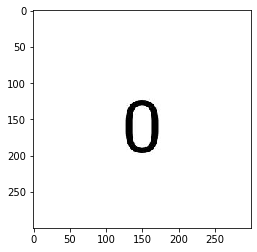

In [49]:
plt.imshow(Roboto_sans_serif)

In [50]:
os.listdir(train_path)

['Roboto_sans_serif', 'times_serif']

In [51]:
os.listdir(train_path+'times_serif')[0]

'0 - Copy (10).jpg'

In [53]:
times_serif = train_path+'times_serif\\'+'0.jpg'

In [54]:
times_serif

'Font Collection\\train\\times_serif\\0.jpg'

In [55]:
times_serif = imread(times_serif)

In [57]:
times_serif

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

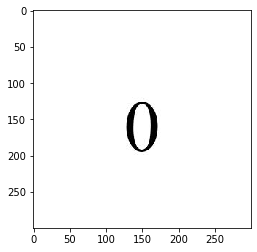

In [58]:
plt.imshow(times_serif)

In [59]:
len(os.listdir(train_path+'Roboto_sans_serif'))

949

In [60]:
len(os.listdir(train_path+'times_serif'))

949

In [61]:
len(os.listdir(test_path+'Roboto_sans_serif'))

73

In [62]:
len(os.listdir(test_path+'times_serif'))

73

In [63]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+"Roboto_sans_serif"):
    
    img = imread(test_path+"Roboto_sans_serif\\"+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

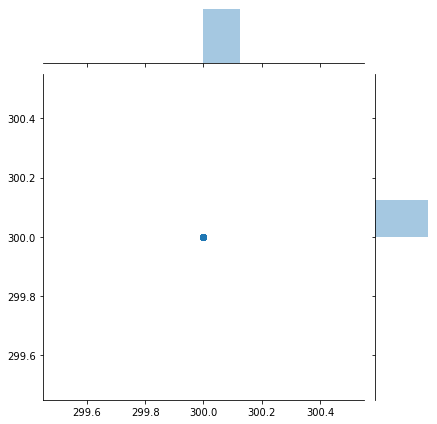

In [64]:
sns.jointplot(dim1,dim2)

In [65]:
#find the average size of the images to choose what images to work with
np.mean(dim1)

300.0

In [66]:
np.mean(dim2)

300.0

In [69]:
image_shape = (224,224,3)

In [70]:
image_shape[:2]

(224, 224)

In [71]:
#rotation, resizing, scaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [72]:
# help(ImageDataGenerator)
#if need to rescale use 1/255
#for example check the min/max
# uninfected_cell.min()
# uninfected_cell.max()
# imread(para_cell).min()
# imread(para_cell).max()

In [73]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

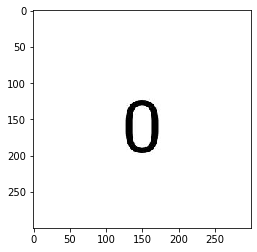

In [76]:
para_img = Roboto_sans_serif
plt.imshow(para_img)

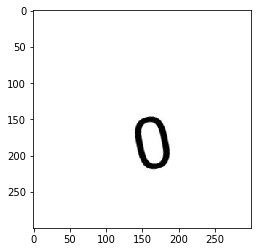

In [77]:
plt.imshow(image_gen.random_transform(para_img))

In [78]:
train_path

'Font Collection\\train\\'

In [79]:
image_gen.flow_from_directory(train_path)

Found 1898 images belonging to 2 classes.


In [81]:
image_gen.flow_from_directory(test_path)

Found 146 images belonging to 2 classes.


In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,Activation

In [83]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

# The first convolution
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

# The second convolution
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

# The third convolution
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the results to feed into a dense layer
model.add(Flatten())

 # 128 neuron in the fully-connected layer
model.add(Dense(128))


model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, is binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [84]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [85]:
from tensorflow.keras.callbacks import EarlyStopping

In [86]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [124]:
# help(image_gen.flow_from_directory)

In [88]:
batch_size = 16

In [89]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 1898 images belonging to 2 classes.


In [90]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 146 images belonging to 2 classes.


In [91]:
train_image_gen.class_indices

{'Roboto_sans_serif': 0, 'times_serif': 1}

In [92]:
import warnings
warnings.filterwarnings('ignore')

In [93]:
results = model.fit(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 119 steps, validate for 10 steps
Epoch 1/20
119/119 [==============================] - 88s 742ms/step - loss: 5.1282 - accuracy: 0.6496 - val_loss: 0.5623 - val_accuracy: 0.7808
Epoch 2/20
119/119 [==============================] - 86s 722ms/step - loss: 0.5100 - accuracy: 0.7950 - val_loss: 0.4120 - val_accuracy: 0.8288
Epoch 3/20
119/119 [==============================] - 86s 720ms/step - loss: 0.4221 - accuracy: 0.8356 - val_loss: 0.3845 - val_accuracy: 0.8562
Epoch 4/20
119/119 [==============================] - 87s 728ms/step - loss: 0.3376 - accuracy: 0.8662 - val_loss: 0.3895 - val_accuracy: 0.8562
Epoch 5/20
119/119 [==============================] - 87s 731ms/step - loss: 0.3345 - accuracy: 0.8741 - val_loss: 0.2159 - val_accuracy: 0.9041
Epoch 6/20
119/119 [==============================] - 87s 732ms/step - loss: 0.2202 - accuracy: 0.8999 - val_loss: 0.2129 - val_accuracy: 0.8904
Epoch 7/20
119/119 [=================

In [94]:
from tensorflow.keras.models import load_model
model.save('Font_detector.h5')

In [95]:
# if you wanted to load existing model
# model = load_model('Font_detector.h5')

In [96]:
#model training history

model.history.history

{'loss': [5.142507211928373,
  0.509498438794947,
  0.42279050424616504,
  0.336139870487601,
  0.33460057504059015,
  0.22068144253565997,
  0.21652727519901463,
  0.1531656510758807,
  0.11950955094392504,
  0.11093295904773624,
  0.10191160171335335],
 'accuracy': [0.6496312,
  0.7950474,
  0.8356164,
  0.86617494,
  0.874078,
  0.89989465,
  0.8951528,
  0.92729187,
  0.94573236,
  0.9483667,
  0.9541623],
 'val_loss': [0.5622715801000595,
  0.41200821101665497,
  0.3844617694616318,
  0.3895377591252327,
  0.21592172905802726,
  0.2128786675632,
  0.2242154381237924,
  0.09033767944783903,
  0.03362553134468271,
  0.1334863381111063,
  0.10289842779448008],
 'val_accuracy': [0.7808219,
  0.8287671,
  0.8561644,
  0.8561644,
  0.9041096,
  0.89041096,
  0.91780823,
  0.9520548,
  0.9726027,
  0.9315069,
  0.98630136]}

In [97]:
losses = pd.DataFrame(model.history.history)

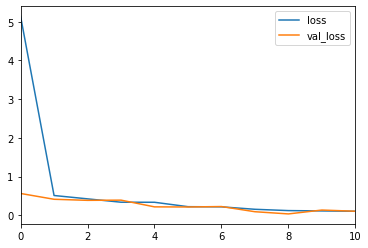

In [98]:
losses[['loss','val_loss']].plot()

In [99]:
model.metrics_names

['loss', 'accuracy']

In [100]:
pred = model.predict(test_image_gen)

In [101]:
pred

array([[3.7231711e-03],
       [1.0062278e-01],
       [2.3926697e-03],
       [6.6696730e-04],
       [5.5946104e-02],
       [7.3234579e-03],
       [2.4170753e-04],
       [4.4371951e-01],
       [5.0993691e-07],
       [3.0659877e-02],
       [3.5438004e-01],
       [4.8865035e-01],
       [2.7177064e-06],
       [1.1290794e-03],
       [3.0162200e-02],
       [7.1190333e-04],
       [1.1986501e-03],
       [4.0004399e-04],
       [4.2343354e-01],
       [4.5285100e-01],
       [1.0594990e-06],
       [6.5514080e-02],
       [4.5315480e-01],
       [5.1353648e-02],
       [1.6108575e-07],
       [2.6009110e-01],
       [1.8665579e-04],
       [6.1401766e-04],
       [8.7857353e-07],
       [8.8303915e-04],
       [4.6593279e-05],
       [3.2428620e-04],
       [6.8169393e-05],
       [1.6087675e-01],
       [2.8764540e-01],
       [2.8598252e-01],
       [2.8101278e-03],
       [1.5989905e-10],
       [1.2418376e-03],
       [2.8554383e-01],
       [4.9837074e-01],
       [4.983707

In [102]:
from tensorflow.keras.preprocessing import image

In [103]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict(test_image_gen)

In [104]:
pred_probabilities

array([[3.1445408e-03],
       [3.6773151e-01],
       [8.1819566e-03],
       [1.0225275e-03],
       [1.3180972e-03],
       [1.6246103e-02],
       [2.5345682e-06],
       [1.7798689e-01],
       [2.9355791e-05],
       [3.0937837e-04],
       [2.1247731e-03],
       [5.1790874e-02],
       [3.1936684e-09],
       [5.5524462e-04],
       [2.6526290e-04],
       [2.0995147e-05],
       [3.4359598e-04],
       [3.5468300e-03],
       [2.5325656e-04],
       [4.9837074e-01],
       [1.4381586e-05],
       [5.3711105e-02],
       [4.9837074e-01],
       [8.4337993e-03],
       [4.3051146e-05],
       [5.4252982e-02],
       [3.9927527e-05],
       [1.4666103e-04],
       [1.4262512e-05],
       [3.2050829e-02],
       [1.5436413e-05],
       [2.7910949e-07],
       [2.5655987e-04],
       [7.2130471e-02],
       [1.0917122e-01],
       [1.8563615e-02],
       [7.7545093e-07],
       [1.4663740e-06],
       [4.2111698e-01],
       [2.0539638e-02],
       [4.9837074e-01],
       [4.983707

In [105]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [106]:
predictions = pred_probabilities > 0.5
#for times-san-serif

In [107]:
predictions

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [113]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [109]:
# Precision: Precsion tells us about when it predicts yes, how often is it correct.
# Recall: Recall gives us an idea about when it’s actually yes, how often does it predict yes.


print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        73
           1       0.99      0.93      0.96        73

    accuracy                           0.96       146
   macro avg       0.96      0.96      0.96       146
weighted avg       0.96      0.96      0.96       146



In [110]:
#to see how many we are misclassifying
confusion_matrix(test_image_gen.classes,predictions)

array([[72,  1],
       [ 5, 68]], dtype=int64)

In [112]:
# help(confusion_matrix)
#       Predicted: No Predicted: Yes
#     Actual: No     72, 1 
#     Actual: Yes    5, 68

In [115]:
print('Accuracy Score :',accuracy_score(test_image_gen.classes,predictions)) 

Accuracy Score : 0.958904109589041


# Predicting on a image!

In [169]:
my_image = test_path+'times_serif\\'+'c_T.jpg'

In [170]:
from tensorflow.keras.preprocessing import image

In [171]:
my_image = image.load_img(my_image,target_size=image_shape)


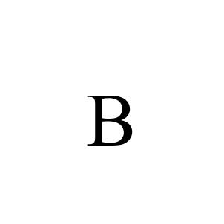

In [172]:
my_image

In [173]:
# to examine the model we are working with
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [184]:
my_img_arr = image.img_to_array(my_image)

In [185]:
my_img_arr

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [186]:
# check the shape of the image array
#we want the shape to be (1,224,224,3) adding a new column because the model expects batch number
my_img_arr.shape

(224, 224, 3)

In [187]:
my_img_arr = np.expand_dims(my_img_arr, axis=0)

In [188]:
my_img_arr.shape

(1, 224, 224, 3)

In [189]:
#pass the image array to the model for a prediction
model.predict(my_img_arr)

array([[1.]], dtype=float32)

In [190]:
pred_score=train_image_gen.class_indices
pred_score

{'Roboto_sans_serif': 0, 'times_serif': 1}